In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
fever = pd.read_csv('fever.csv')
fever = fever.dropna()



In [3]:
fever.head


<bound method NDFrame.head of       age  temperature disease   severity
0     8.0         99.5   fever  notsevere
1     8.0         99.6   fever  notsevere
2     8.0         99.7   fever  notsevere
3     8.0         99.8   fever  notsevere
4     8.0         99.9   fever  notsevere
..    ...          ...     ...        ...
499  70.0        104.6   fever     severe
500  70.0        104.7   fever     severe
501  70.0        104.8   fever     severe
502  70.0        104.9   fever     severe
503  70.0        105.0   fever     severe

[504 rows x 4 columns]>

In [5]:
X = fever[['age','temperature']]
y = fever ['severity']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [9]:
knn.score(X_test, y_test)

0.9761904761904762

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=2,random_state=100,max_features= None, min_samples_leaf = 15)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)


0.9285714285714286

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.9047619047619048

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.9206349206349206

In [18]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber',shuffle=False,random_state=160)
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

0.47619047619047616

<IPython.core.display.Javascript object>


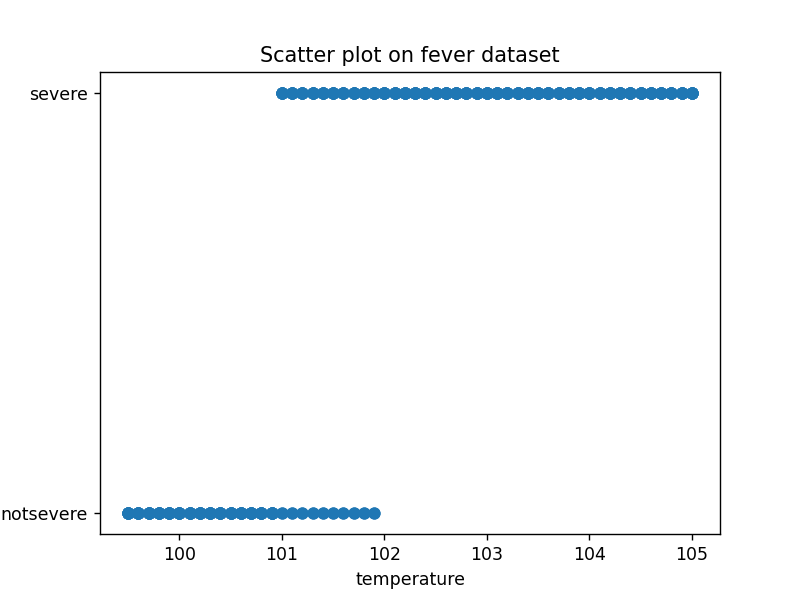

Text(0.5, 1.0, 'Scatter plot on fever dataset')

In [19]:
plt.scatter(fever['temperature'],fever['severity'])
plt.xlabel('temperature')
plt.ylabel('severity')
plt.title('Scatter plot on fever dataset')

In [10]:
knn.predict([[45,98.6]])

array(['notsevere'], dtype=object)

In [17]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(knn, filename)

['finalized_model.sav']

In [18]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9761904761904762


In [11]:
import pickle 
pickle.dump(knn,open('fevermodel.bin','wb'))

In [7]:
import requests


url = "http://127.0.0.1:9696/"



r = requests.post(url,json = '{"list": "[45,106,45,56,45,120,183,70]"}')
r.text.strip()

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n  "http://www.w3.org/TR/html4/loose.dtd">\n<html>\n  <head>\n    <title>TypeError: string indices must be integers // Werkzeug Debugger</title>\n    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css"\n        type="text/css">\n    <!-- We need to make sure this has a favicon so that the debugger does\n         not by accident trigger a request to /favicon.ico which might\n         change the application state. -->\n    <link rel="shortcut icon"\n        href="?__debugger__=yes&amp;cmd=resource&amp;f=console.png">\n    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=jquery.js"></script>\n    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=debugger.js"></script>\n    <script type="text/javascript">\n      var TRACEBACK = 1432600106760,\n          CONSOLE_MODE = false,\n          EVALEX = true,\n          EVALEX_TRUSTED = false,\n          SECRET = "W01SMe3VVFaBOcsRh281";\n    </scri